# Activity 4: Grapevines in a warming world

___

In the last lesson, you learned about pandas, dataframes, and seaborn. You learned that the harvest dates of grapevines in Europe have been recorded for centuries and you read the data in to Jupyter to analyze using `pandas`. 

In the cell below, import `pandas` again, use the `pd.read_csv()` function to read the [data](https://github.com/DanChitwood/PlantsAndPython/blob/master/grape_harvest.csv) (`grape_harvest.csv`) in using the `pd.read_csv()` function, and make sure the data is ready to analyze by printing the outputs of `.head()`, `.tail()`, `.describe()`, and `.columns` functions in the cell below.

Remember to import `pandas`!

Now that your data is read in, let's use masking, data visualization, and line fitting to explore the relationship between grape harvest date and climate over the centuries.

___

## Masking

### Determining the earliest and latest harvest dates and where they occurred

We'll start off our exploration of grape harvest dates by figuring out when and where the earliest and latest harvest dates occurred.

The pandas dataframe you just created should have four columns, which are:

* **'year'**: the year the data was collected
* **'region'**: the region in Europe that the data was collected from
* **'harvest'**: the harvest date recorded. Harvest date is defined as number of days after August 31st. A negative number means the grapes were harvested before August 31st that year, and a positive number after.
* **'anomaly'**: the temperature anomaly. For a given year, this number represents how much colder (negative) or hotter (positive) Europe was compared to a long term reference value, in degrees Celsius

Below, print out statements answering the following questions using masking techniques that you have learned:

1) **Which year did the earliest harvest happen, which region did it occur in, and how early was the harvest?**

2) **Which year did the latest harvest happen, which region did it occur in, and how late was the harvest?**

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv(r'grape_harvest.csv')
len(df.index)

4732

In [7]:
df[df["harvest"] == df["harvest"].min()][["year","region","harvest"]]

,year,region,harvest
1249,1822,champagne_2,-13.0


In [8]:
df[df["harvest"] == df["harvest"].max()][["year","region","harvest"]]

,year,region,harvest
2784,1851,luxembourg,75.0


### Finding median harvest dates in 50 year intervals

You want to know if the grape harvest date is changing, and if so, is it getting earlier or later?

You decide that you would like to know the median grape harvest date for the following 50 year intervals, as well as the median since the year 2000:

* 1800-1849
* 1850-1899
* 1900-1949
* 1950-1999
* 2000-2007

**For each of the above intervals, calculate the median grape harvest date. For each interval print out statements saying "The median harvest date for years (*insert interval here*) is: x."**


**Is the harvest date for grapes getting earlier or later?**


In [9]:
ls = []
ls += [df[(df["year"] >= 1800) & (df["year"] < 1850)]["harvest"].median()]
ls.append(df[(df["year"] >= 1850) & (df["year"] < 1900)]["harvest"].median())
ls.append(df[(df["year"] >= 1900) & (df["year"] < 1950)]["harvest"].median())
ls.append(df[(df["year"] >= 1950) & (df["year"] < 2000)]["harvest"].median())
ls.append(df[df["year"] >= 2000]["harvest"].median())

year = 1800
for i in ls:
    if year == 2000:
        print(f"The median harvest date for year {year} to {df["year"].max()} is {i}")
        break
        
    print(f"The median harvest date for year {year} to {year + 49} is {i}")
    year += 50


The median harvest date for year 1800 to 1849 is 35.95
The median harvest date for year 1850 to 1899 is 33.8
The median harvest date for year 1900 to 1949 is 27.9
The median harvest date for year 1950 to 1999 is 28.0
The median harvest date for year 2000 to 2007 is 19.9


____
## Visualization and correlation

Now that you understand a bit about the overall trends in the data, you want to examine other factors that might influence grape harvest date besides historical changes in climate.

You see that the data comes from many regions, all the way from sunny Spain to Germany. You wonder if these latitudinal differences would have any effect on the grape harvest dates.

**Make a boxplot comparing the distributions of grape harvest dates where the x-axis is "region" and the y-axis "harvest". The regions will be ordered by latitude, from the most southern to northern. This will allow you to assess visually if latitude is affecting grape harvest date.**

Your plot should:

1. include axis labels (use `matplotlib` functions that you have already learned about)
2. have a title (use `matplotlib` functions that you have already learned about)
3. keep the figure size and x ticks commands provided in the code below
4. import `seaborn`
5. finally, arrange the regions by latitude, from the most southern to the most northern. To do this, use the provided list `latitude_order`. Within the `seaborn` boxplot function, specify the `order` argument as follows: `order = latitude_order`. This will arrange the regions in your boxplot from the most southern to northern.


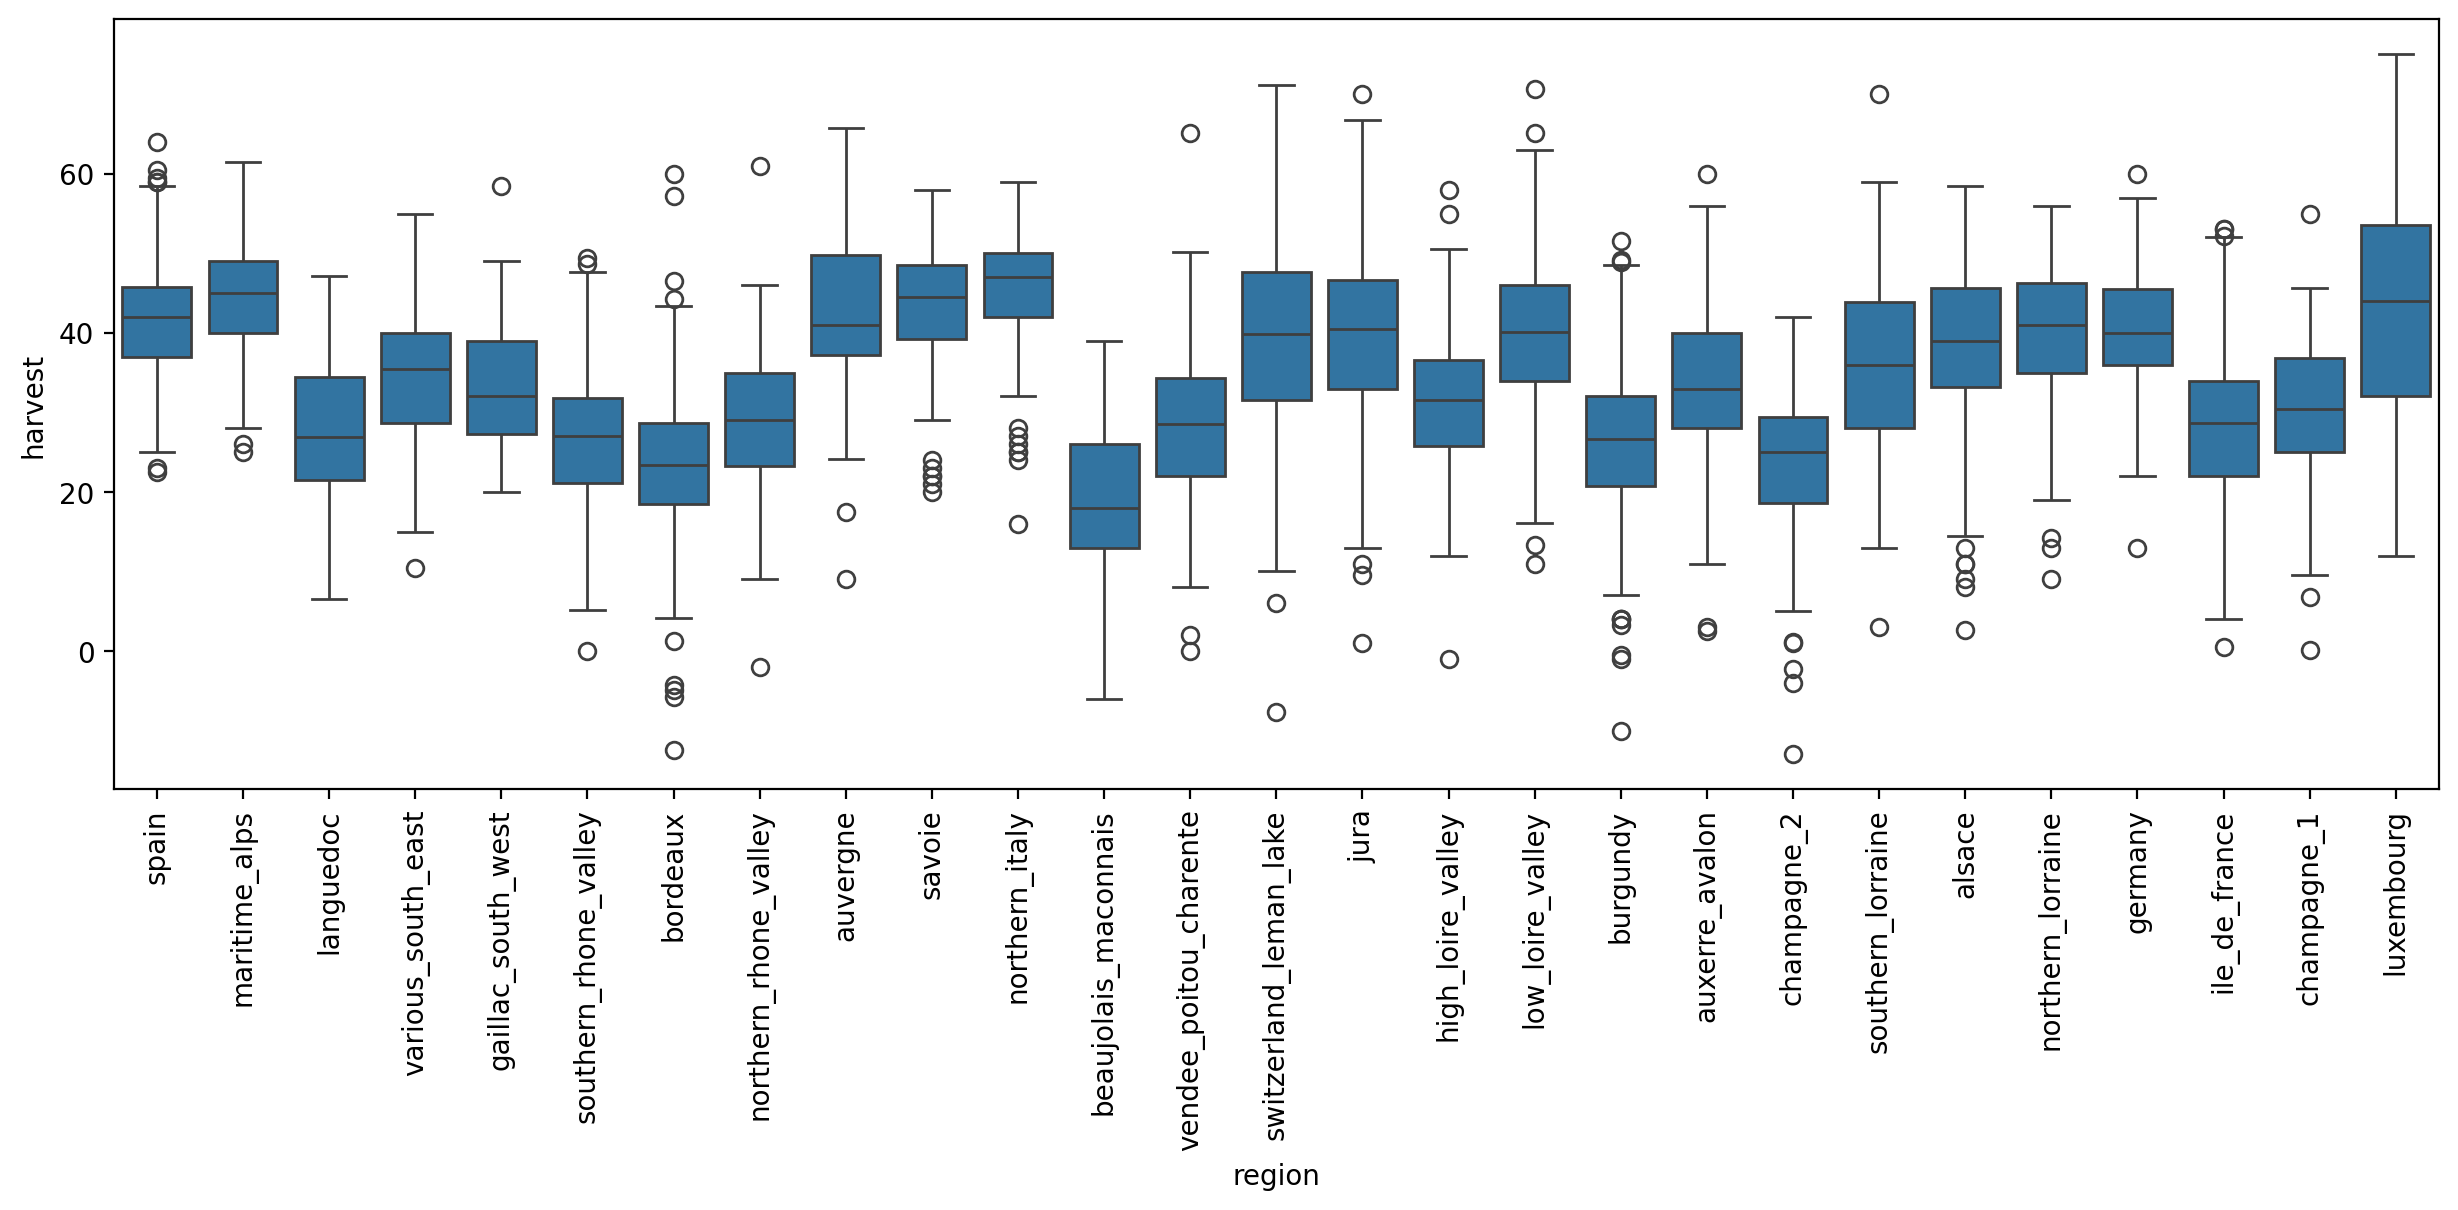

In [16]:
plt.figure(figsize=(15,5),dpi=200)
lat_order = ['spain','maritime_alps','languedoc','various_south_east',
                  'gaillac_south_west','southern_rhone_valley','bordeaux',
                  'northern_rhone_valley','auvergne','savoie','northern_italy',
                  'beaujolais_maconnais','vendee_poitou_charente','switzerland_leman_lake',
                  'jura','high_loire_valley','low_loire_valley','burgundy','auxerre_avalon',
                  'champagne_2','southern_lorraine','alsace','northern_lorraine',
                  'germany','ile_de_france','champagne_1','luxembourg'] 
                    
plt.xticks(rotation=90)
sns.boxplot(data=df, x="region", y="harvest",order=lat_order)

plt.show()

**Based on your graph, do you believe that latitude affects the harvest date?** Explain your reasoning. If harvest date changes going south to north, how does this impact your analysis of the effect of history and climate change on harvest date? If harvest date is not affected by latitude, what are the implications for your analysis then?

In [57]:
# Provide your interpretation from your plot of the relationship between harvest date and latitude


### Looking for correlation in harvest date between Burgundy and Switzerland

You wonder if the grape harvest dates in different regions are correlated with each other. Two regions with some of the longest records of grape harvest dates are Burgundy ("burgundy") and Switzerland ("switzerland_leman_lake"). You would like to examine the correlation between the grape harvest dates at these two locations. But first, you need to make sure there is a matching grape harvest date for every year between these regions.

Your task below is to:

**1. Create two masked dataframes, one named "burgundy" with only "burgundy" data and the other named "switzerland", with only "switzerland_leman_lake" data.**

**2. Then, using the "merge" function code provided below, create a dataset where every year of recorded "burgundy" data has a matching year or recorded "switzerland" data. Be sure to inspect the column names**

**3. Using your new merged dataframe named "burgundy_switzerland", print out the earliest and latest year in your new merged data.**

In [19]:
burgundy = df[df["region"] == "burgundy"]
switzerland = df[df["region"] == "switzerland_leman_lake"]

burXswitz = burgundy.merge(switzerland, on="year") 

print("latest date:",burXswitz["year"].max())
print("earliest date:",burXswitz["year"].min())

latest date: 2006
earliest date: 1655


Now that you have data that is matched, with exactly one "burgundy" and one "switzerland_leman_lake" observation for each year, you can examine if the grape harvest dates are correlated.

Using the seaborn `jointplot()` function (documentation [here](https://seaborn.pydata.org/generated/seaborn.jointplot.html)), make a scatterplot with distributions on the sides to look at this correaltion. **Make sure that your plot includes the regression line!**

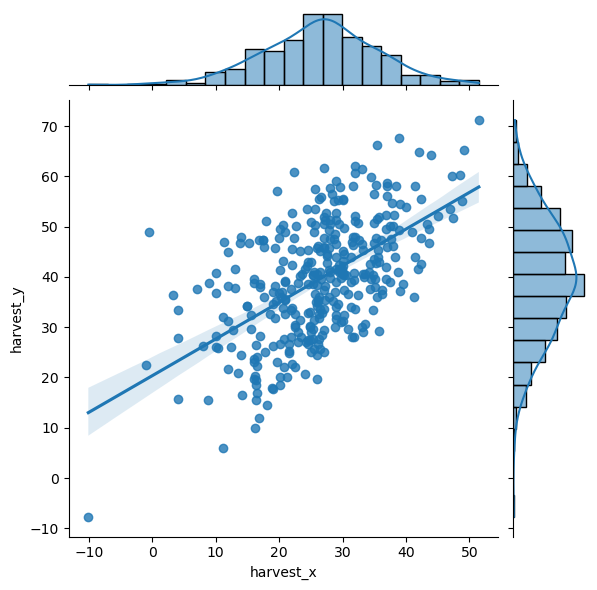

In [21]:
sns.jointplot(data=burXswitz, x="harvest_x", y="harvest_y", kind="reg")
plt.show()

# or we could use
#sns.jointplot(data=burXswitz, x="harvest_x", y="harvest_y")
#sns.regplot(data=burXswitz, x="harvest_x", y="harvest_y",scatter=False)

**Question**: Correlation is the relationship between two variables: for example, when one variable increases in value, the other increases as well (positive correlation) or when one variable increases in value the other decreases (negative correlation). Variability is how spread the data is or how clustered.

Do you think that harvest date between the two regions is correlated? Positive or negative? How variable is the data? Is the variability constant across harvest dates? What can you learn from your graph?

In [15]:
# Provide your interpretation of your plot here


____
## Graphing temperature anomaly vs year and harvest date vs temperature anomaly

You have been wondering this whole time: is the temperature increasing with time?

To find out the answer to this question, **below create a scatter plot with "anomaly" on the y-axis and "year" on the x-axis.** Make sure your plots have labels and a title.

**Remember:** If you have already imported in `seaborn`, if you use `matplotlib` functions, your plots will still have the style of `seaborn` and you can refer to dataframes and specific columns within `matplotlib` functions that you have already learned about! Use `matplotlib` functions and refer to your dataframe and columns by name and see what happens!

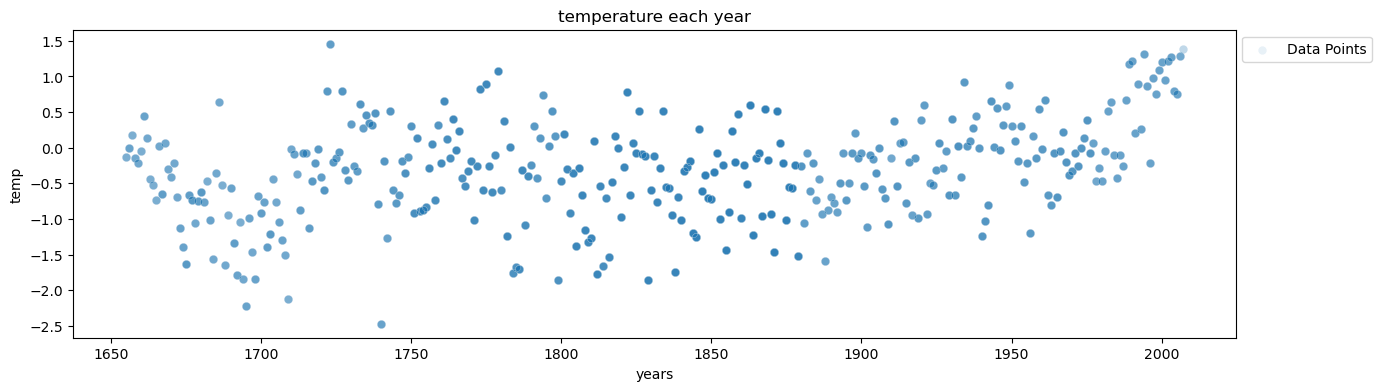

In [48]:
plt.figure(figsize=(15,4))
sns.scatterplot(data=df,y="anomaly",x="year",label="Data Points",alpha=0.1)

plt.xlabel("years")
plt.ylabel("temp")

plt.title("temperature each year")
plt.legend(bbox_to_anchor=(1,1), loc='upper left')

plt.show()

You see that indeed, temperature is increasing with time. The classic "hockey stick" pattern. You want to see if the harvest date is impacted by the temperature anomaly. As above, **below create a scatterplot with "harvest date" on the y-axis and "anomaly" on the x-axis.**  Make sure your plots have labels and a title.

**Hint**: you are plotting lots of data and it will be hard to see the underlying relationship because of overplotting. You can insert the `alpha` argument into the `scatter()` function to create transparency and see your data better. You can start with an alpha as low as 0.1 (e.g., `alpha=0.1`) and adjust it higher if you like.

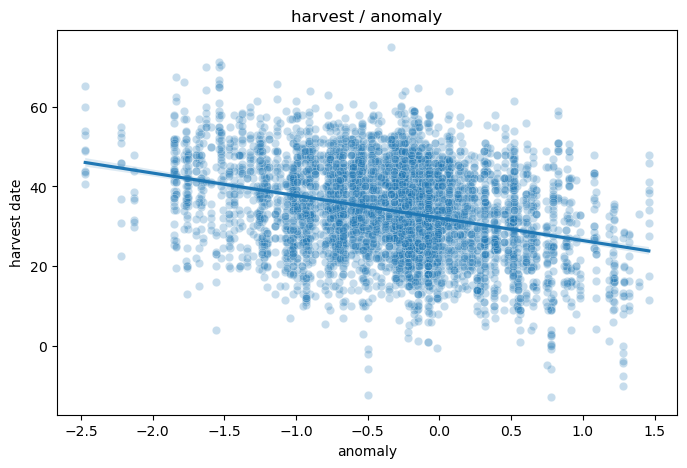

In [51]:
plt.figure(figsize=(8,5))

sns.scatterplot(data=df,y="harvest",x="anomaly",alpha=0.25)
sns.regplot(data=df,y="harvest",x="anomaly",scatter=False)

plt.ylabel("harvest date")
plt.title("harvest / anomaly")

plt.show()

**Question:** Based on your graph, is there a correaltion between harvest date and temperature anamoly? If so, is it positive or negative? Do you think the relationship is linear or is curved, like your temperature anomaly vs. year graph?

In [20]:
# Write your thoughts here about the relationship between harvest date and temperature here


### Modeling harvest date as a function of temperature anomaly using `seaborn`

You wonder if "harvest" date can be modeled as a function of temperature "anomaly". You even suspect, after plotting "harvest" vs. "anomaly" above, if this relationship might be linear. You are amazed to learn that in fact others suggest this relationship is linear! In the [publication](https://www.clim-past.net/8/1403/2012/cp-8-1403-2012.pdf) where you got this data from, it suggests that others have found that *for every 1C rise in temperature, harvest date is on average 10 days earlier!*

You set out to create a linear model predicting "harvest" as a function of "anomaly" and realize that this is wasy to do using the `sns.lmplot()` function! Read the documentation for `sns.lmplot()` [here](https://seaborn.pydata.org/generated/seaborn.lmplot.html) and make a plot, with a linear fit displayed, of harvest date versus temperature anomaly.

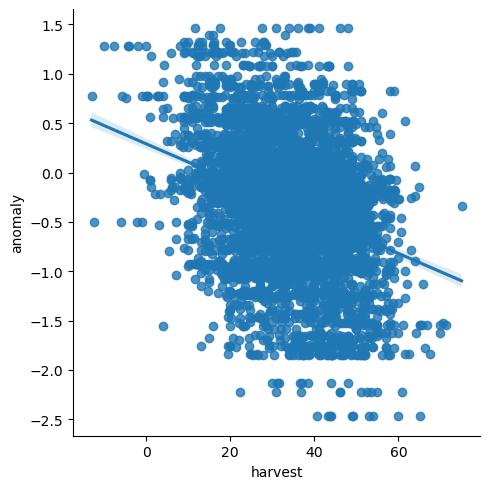

In [55]:
sns.lmplot(data=df,x="harvest",y="anomaly")
plt.show()

There seems to be a lot of overplotting with too many points! In the cell below, use the `scatter=False` argument to remove the datapoints for us to see only the fitted line!

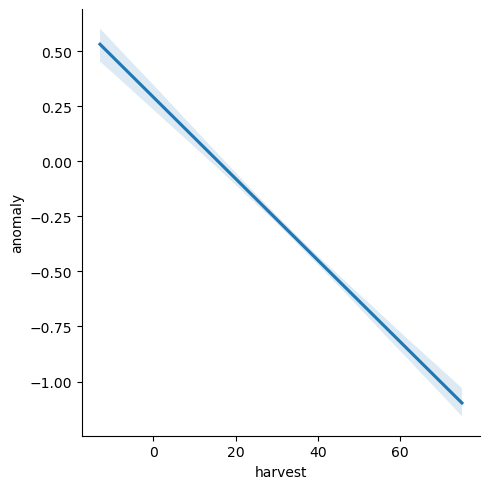

In [54]:
sns.lmplot(data=df,x="harvest",y="anomaly",scatter=False)
plt.show()

Look at your fitted line and try to estimate the slope. Remember, the slope is the unit change in $y$ values divided by the unit change in $x$ values. For each degree Celsius, by how many days does the harvest change approximately?

In [25]:
# Put your estimate of how many days the harvest changes per each degree of temperature anomaly in Celsius.



Reexamining your graph of temperature anomaly versus year, does your result make sense? What does this say about the pace of climate change and implications for agriculture?

In [ ]:
# Write your thoughts about the pace of climate change and its implications
